# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dicky Anugrah
- **Email:** m001b4ky1119@bangkit.academy
- **ID Dicoding:** m001b4ky1119

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana suhu dan kondisi cuaca (seperti hujan dan hari libur) mempengaruhi jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
- Pertanyaan 2: Bulan apakah yang memiliki jumlah penyewaan sepeda tertinggi, dan bagaimana kondisi cuaca pada bulan tersebut mempengaruhi perilaku pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
#pip install gdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gdown
from google.colab import files

# Install gdown if not installed
!pip install gdown


## Data Wrangling

### Gathering Data

In [3]:
import gdown

# Download day.csv
gdown.download('https://drive.google.com/uc?id=1xpHY1JhvujNdQohcn9uRFYN_cTEXkUj5', 'day.csv', quiet=False)

# Download hour.csv
gdown.download('https://drive.google.com/uc?id=1_OzDKlT14kZq3X2ZuQ8JWbBsQV7ed1XX', 'hour.csv', quiet=False)

# Membaca dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")



Downloading...
From: https://drive.google.com/uc?id=1xpHY1JhvujNdQohcn9uRFYN_cTEXkUj5
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 27.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_OzDKlT14kZq3X2ZuQ8JWbBsQV7ed1XX
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 104MB/s]


**Insight:**
- Dataset berhasil diunduh dan siap digunakan untuk analisis. Dataset ini terdiri dari dua file, yaitu day.csv yang mencakup informasi harian penyewaan sepeda dan hour.csv yang menyimpan data berdasarkan jam. Informasi yang terdapat di dalam kedua dataset ini akan memberikan wawasan tentang pola penyewaan sepeda berdasarkan waktu, cuaca, dan hari dalam seminggu.

### Assessing Data

In [4]:
# Menampilkan informasi dasar dari DataFrame
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

In [5]:
#menampilkan 5 baris pertama
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#memeriksa missing value
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
#memeriksa jumlah duplikasi
print("Jumlah duplikasi day.csv: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour.csv: ", hour_df.duplicated().sum())

Jumlah duplikasi day.csv:  0
Jumlah duplikasi hour.csv:  0


In [8]:
#Statistik Deskriptif
day_df.describe()
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# Memeriksa nilai tidak akurat (misalnya, terlalu tinggi atau tidak realistis)
outlier_cnt_day = day_df[day_df['cnt'] > day_df['cnt'].quantile(0.95)]
outlier_cnt_hour = hour_df[hour_df['cnt'] > hour_df['cnt'].quantile(0.95)]

print("Outliers in cnt (day_df):\n", outlier_cnt_day)
print("Outliers in cnt (hour_df):\n", outlier_cnt_hour)

# Memeriksa nilai yang tidak konsisten (misalnya, casual + registered != cnt)
inconsistent_values_day = day_df[day_df['casual'] + day_df['registered'] != day_df['cnt']]
inconsistent_values_hour = hour_df[hour_df['casual'] + hour_df['registered'] != hour_df['cnt']]

print("Inconsistent values in day_df:\n", inconsistent_values_day)
print("Inconsistent values in hour_df:\n", inconsistent_values_hour)

Outliers in cnt (day_df):
      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
441      442  2012-03-17       1   1     3        0        6           0   
447      448  2012-03-23       2   1     3        0        5           1   
503      504  2012-05-18       2   1     5        0        5           1   
504      505  2012-05-19       2   1     5        0        6           0   
518      519  2012-06-02       2   1     6        0        6           0   
519      520  2012-06-03       2   1     6        0        0           0   
524      525  2012-06-08       2   1     6        0        5           1   
531      532  2012-06-15       2   1     6        0        5           1   
532      533  2012-06-16       2   1     6        0        6           0   
570      571  2012-07-24       3   1     7        0        2           1   
571      572  2012-07-25       3   1     7        0        3           1   
578      579  2012-08-01       3   1     8        0        3 

**Insight:**
-  Analisis menunjukkan bahwa tidak terdapat duplikasi, missing value, dan data tidak valid dalam kedua DataFrame, day_df dan hour_df, terdapat beberapa outlier tetapi datanya valid sehingga tidak perlu dihapus sehingga integritas data terjaga dan dapat digunakan untuk analisis lebih lanjut.
- Meskipun tidak ditemukan duplikasi, beberapa kolom masih memiliki tipe data yang tidak sesuai, seperti kolom dteday yang perlu diubah menjadi datetime, serta kolom kategori yang sebaiknya dikonversi menjadi tipe category untuk efisiensi dalam analisis.

### Cleaning Data

In [10]:
# Mengubah kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah kolom kategori menjadi tipe category
day_df['season'] = day_df['season'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

# Jika ada kolom di hour_df yang juga perlu diubah, lakukan hal yang sama
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df['season'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')


In [11]:
# Setelah Data Cleaning
print("\nSetelah Data Cleaning:")
print(day_df.info())
print(hour_df.info())


Setelah Data Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes:

In [23]:
# Menyimpan dataset yang sudah di-cleaning menjadi file CSV
day_df.to_csv('cleaned_day_df.csv', index=False)
hour_df.to_csv('cleaned_hour_df.csv', index=False)

# Download file CSV yang sudah di-cleaning
files.download('cleaned_day_df.csv')
files.download('cleaned_hour_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Insight:**

- Perbaikan Tipe Data: Mengubah tipe data dteday ke datetime akan memudahkan analisis waktu, sedangkan mengubah kolom yang bersifat kategorikal ke tipe category akan menghemat memori dan meningkatkan efisiensi pemrosesan data saat analisis.
- Kesiapan untuk Analisis Lanjutan: Setelah melakukan perubahan ini, DataFrame Anda akan lebih siap untuk analisis lebih lanjut, termasuk model prediksi atau analisis tren.


## Exploratory Data Analysis (EDA)

**Pertanyaan 1: Bagaimana suhu dan kondisi cuaca (seperti hujan dan hari libur) mempengaruhi jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?**


**Ekslorasi:** Mengeksplorasi hubungan antara suhu dan kondisi cuaca (seperti hujan dan hari libur) terhadap jumlah penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan.

In [13]:
#melihat statistik deskriptif dari kolom yang relevan
day_df[['temp', 'weathersit', 'cnt']].describe()


,temp,cnt
count,731.000000,731.000000
mean,0.495385,4504.348837
std,0.183051,1937.211452
min,0.059130,22.000000
25%,0.337083,3152.000000
50%,0.498333,4548.000000
75%,0.655417,5956.000000
max,0.861667,8714.000000


In [14]:
# Menghitung matriks korelasi
corr_matrix = day_df[['temp', 'cnt']].corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


In [15]:
#kovarian suhu dan jumlah penyewa sepeda
cov_temp_cnt = day_df[['temp', 'cnt']].cov()
print(cov_temp_cnt)


            temp           cnt
temp    0.033508  2.225147e+02
cnt   222.514700  3.752788e+06


In [16]:
# Mengkategorikan weekday menjadi hari kerja (0-4) dan akhir pekan (5-6)
day_df['is_weekend'] = day_df['weekday'].isin([5, 6]).astype(int)  # 1 untuk akhir pekan, 0 untuk hari kerja

# Membuat pivot table untuk menyederhanakan tampilan
pivot_table = day_df.pivot_table(values='cnt', index='weathersit', columns='is_weekend', aggfunc='mean', observed=False)
print(pivot_table)


is_weekend            0        1
weathersit                      
1           4818.651652  5025.70
2           4027.046512  4056.08
3           1754.058824  2012.50


**Pertanyaan 2: Pertanyaan 2: Bulan apakah yang memiliki jumlah penyewaan sepeda tertinggi, dan bagaimana kondisi cuaca pada bulan tersebut mempengaruhi perilaku pengguna?**

**Eksplorasi:** Mengeksplorasi bulan dengan jumlah penyewaan sepeda tertinggi dan dampak kondisi cuaca pada perilaku pengguna selama bulan tersebut.

In [17]:
#HItung jumlah penyewa sepeda perbulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
print(monthly_rentals)


mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [18]:
#Cari penyewa tertinggi di bulan apa
highest_month = monthly_rentals.idxmax()
highest_value = monthly_rentals.max()
print(f"Bulan dengan penyewaan tertinggi: {highest_month}, Jumlah: {highest_value}")


Bulan dengan penyewaan tertinggi: 8, Jumlah: 351194


In [19]:
#kondisi cuaca bulan tertinggi
weather_highest_month = day_df[day_df['mnth'] == highest_month]
print(weather_highest_month[['temp', 'weathersit']].describe())


            temp
count  62.000000
mean    0.708582
std     0.039913
min     0.635833
25%     0.684375
50%     0.707696
75%     0.730833
max     0.793333


In [20]:
# Menghitung korelasi
correlation = day_df[['cnt', 'mnth', 'weathersit']].corr()
print("Korelasi:")
print(correlation)

Korelasi:
                 cnt      mnth  weathersit
cnt         1.000000  0.279977   -0.297391
mnth        0.279977  1.000000    0.043528
weathersit -0.297391  0.043528    1.000000


In [21]:
# Menghitung kovarians
covariance = day_df[['cnt', 'mnth', 'weathersit']].cov()
print("\nKovarians:")
print(covariance)


Kovarians:
                     cnt         mnth  weathersit
cnt         3.752788e+06  1872.230742 -313.918923
mnth        1.872231e+03    11.915702    0.081873
weathersit -3.139189e+02     0.081873    0.296910


In [22]:
# Membuat pivot table untuk menghitung rata-rata penyewaan per bulan berdasarkan kondisi cuaca
pivot_table_monthly = day_df.pivot_table(values='cnt', index='mnth', columns='weathersit', aggfunc='mean', observed=False)
pivot_table_monthly.fillna(pivot_table_monthly.mean(), inplace=True)
print(pivot_table_monthly)



weathersit            1            2            3
mnth                                             
1           2361.918919  1959.833333   506.000000
2           2839.135135  2322.894737  2169.000000
3           3888.583333  3609.291667  1154.000000
4           5328.351351  3339.190476   911.000000
5           5698.324324  4833.920000  1857.437037
6           6061.521739  4822.285714  1857.437037
7           5516.980392  5912.300000  4459.000000
8           5835.372093  5277.526316  1857.437037
9           6733.333333  4885.125000  2182.666667
10          5859.281250  4989.080000  2025.600000
11          4395.833333  4267.800000  2063.000000
12          3503.062500  3525.851852  1246.666667


**Insight:**
- Ada korelasi positif signifikan antara suhu dan jumlah penyewaan sepeda (korelasi 0.63). Penyewaan lebih tinggi saat suhu naik, terutama pada akhir pekan (5025.70) dibanding hari kerja (4818.65) saat cuaca baik (weathersit 1). Cuaca buruk menurunkan jumlah penyewaan.
- Penyewaan sepeda tertinggi terjadi pada bulan Agustus (351,194 penyewaan), terutama saat cuaca baik (rata-rata 5835.37). Cuaca cerah selama bulan-bulan hangat sangat mendorong penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

             temp          cnt
count  731.000000   731.000000
mean     0.495385  4504.348837
std      0.183051  1937.211452
min      0.059130    22.000000
25%      0.337083  3152.000000
50%      0.498333  4548.000000
75%      0.655417  5956.000000
max      0.861667  8714.000000
Matriks Korelasi:
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000
Covarian antara suhu dan penyewaan sepeda:
            temp           cnt
temp    0.033508  2.225147e+02
cnt   222.514700  3.752788e+06
Pivot table rata-rata penyewaan berdasarkan kondisi cuaca dan hari:
is_weekend            0        1
weathersit                      
1           4818.651652  5025.70
2           4027.046512  4056.08
3           1754.058824  2012.50


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


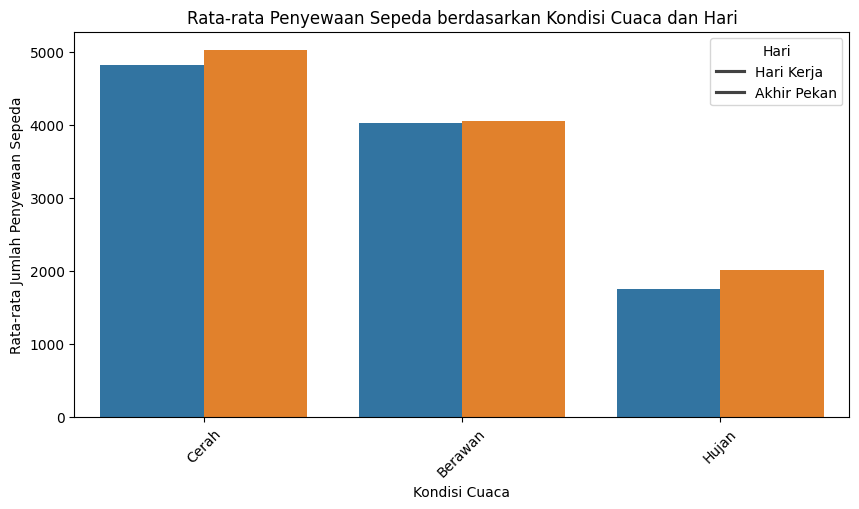

In [ ]:
# Melihat statistik deskriptif
print(day_df[['temp', 'weathersit', 'cnt']].describe())

# Menghitung korelasi
corr_matrix = day_df[['temp', 'cnt']].corr()
print("Matriks Korelasi:")
print(corr_matrix)

# Menghitung covarian
cov_temp_cnt = day_df[['temp', 'cnt']].cov()
print("Covarian antara suhu dan penyewaan sepeda:")
print(cov_temp_cnt)

# Mengkategorikan weekday menjadi hari kerja dan akhir pekan
day_df['is_weekend'] = day_df['weekday'].isin([5, 6]).astype(int)  # 1 untuk akhir pekan, 0 untuk hari kerja

# Membuat pivot table
pivot_table = day_df.pivot_table(values='cnt', index='weathersit', columns='is_weekend', aggfunc='mean', observed=False)
print("Pivot table rata-rata penyewaan berdasarkan kondisi cuaca dan hari:")
print(pivot_table)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(data=pivot_table.reset_index().melt(id_vars='weathersit'),
            x='weathersit',
            y='value',
            hue='is_weekend')
plt.title('Rata-rata Penyewaan Sepeda berdasarkan Kondisi Cuaca dan Hari')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Berawan', 'Hujan'], rotation=45)
plt.legend(title='Hari', loc='upper right', labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()

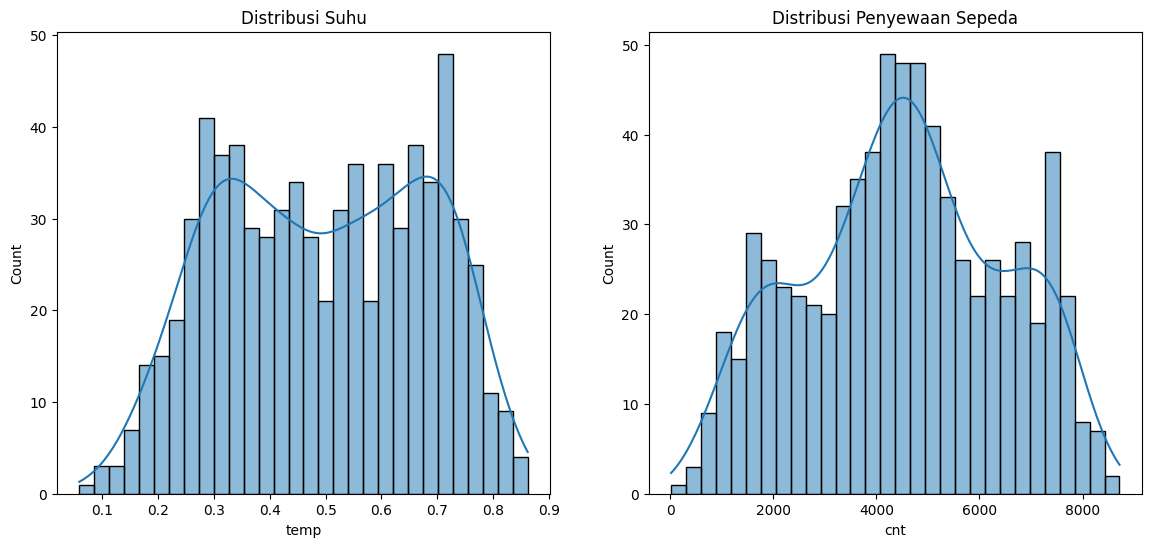

In [ ]:
#BIvariat Distribusi suhu dan penyewa sepeda
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(day_df['temp'], bins=30, kde=True)
plt.title('Distribusi Suhu')

plt.subplot(1, 2, 2)
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Penyewaan Sepeda')

plt.show()


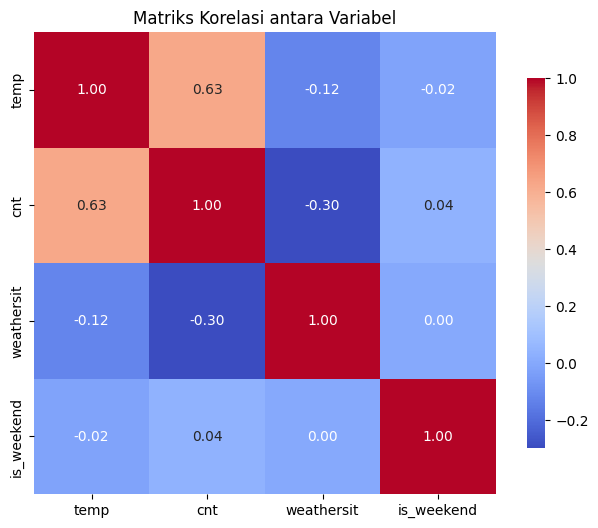

In [ ]:
# Multovariat heatmap untuk menunjukkan korelasi
plt.figure(figsize=(8, 6))
corr = day_df[['temp', 'cnt', 'weathersit', 'is_weekend']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi antara Variabel')
plt.show()


### Pertanyaan 2:

Jumlah penyewaan per bulan:
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64
Bulan dengan penyewaan tertinggi: 8, Jumlah: 351194
Kondisi cuaca bulan tertinggi:
            temp
count  62.000000
mean    0.708582
std     0.039913
min     0.635833
25%     0.684375
50%     0.707696
75%     0.730833
max     0.793333


<Figure size 1200x600 with 0 Axes>

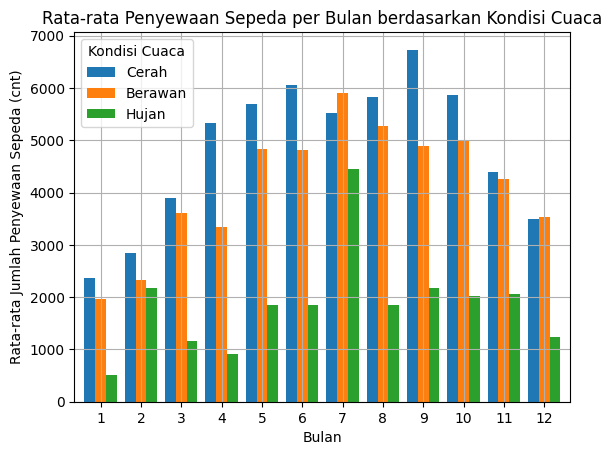

In [ ]:
# Menghitung jumlah penyewaan sepeda per bulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
print("Jumlah penyewaan per bulan:")
print(monthly_rentals)

# Cari bulan dengan penyewaan tertinggi
highest_month = monthly_rentals.idxmax()
highest_value = monthly_rentals.max()
print(f"Bulan dengan penyewaan tertinggi: {highest_month}, Jumlah: {highest_value}")

# Kondisi cuaca bulan tertinggi
weather_highest_month = day_df[day_df['mnth'] == highest_month]
print("Kondisi cuaca bulan tertinggi:")
print(weather_highest_month[['temp', 'weathersit']].describe())

# Visualisasi rata-rata penyewaan per bulan berdasarkan kondisi cuaca
pivot_table_monthly = day_df.pivot_table(values='cnt', index='mnth', columns='weathersit', aggfunc='mean', observed=False)
pivot_table_monthly.fillna(pivot_table_monthly.mean(), inplace=True)

plt.figure(figsize=(12, 6))
pivot_table_monthly.plot(kind='bar', width=0.8)
plt.title('Rata-rata Penyewaan Sepeda per Bulan berdasarkan Kondisi Cuaca')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(rotation=0)
plt.legend(title='Kondisi Cuaca', labels=['Cerah', 'Berawan', 'Hujan'])
plt.grid()
plt.show()


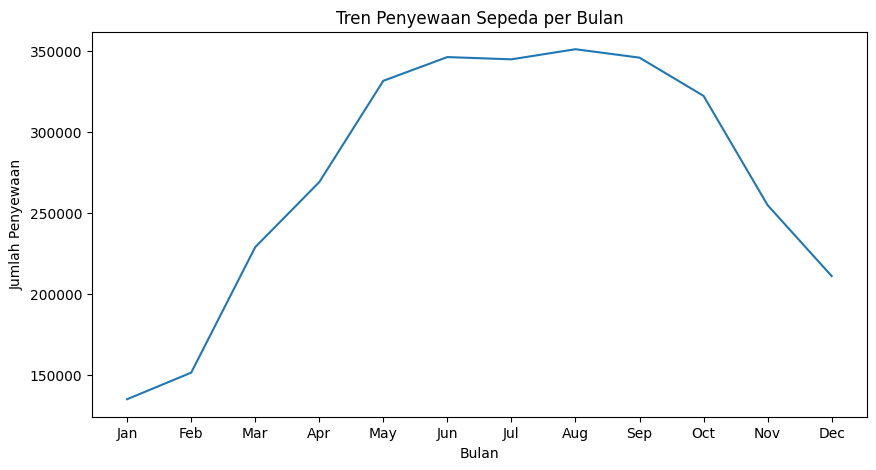

In [ ]:
#Analisis tren berdasarkan bulan dan kondisi cuaca
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rentals)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

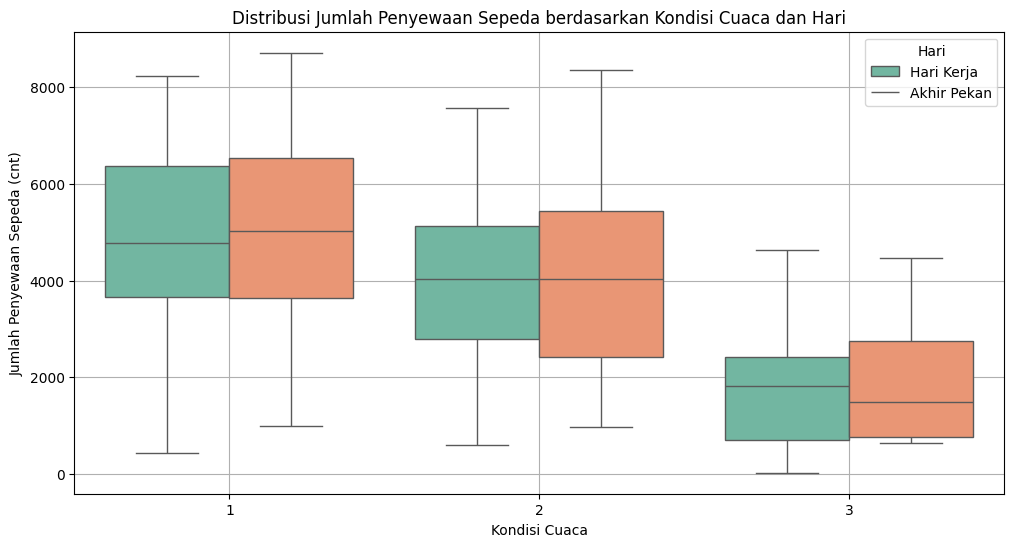

In [ ]:
# Bivariat box plot untuk jumlah penyewaan sepeda berdasarkan kondisi cuaca dan hari
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt', hue='is_weekend', palette='Set2')
plt.title('Distribusi Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca dan Hari')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.legend(title='Hari', labels=['Hari Kerja', 'Akhir Pekan'])
plt.grid()
plt.show()


**Insight:**
- Data menunjukkan bahwa jumlah penyewaan sepeda meningkat secara konsisten dari bulan Januari hingga Agustus, dengan puncak pada bulan Agustus. Tren ini berkorelasi dengan suhu yang lebih hangat dan lebih banyak hari dengan kondisi cuaca baik, mengindikasikan bahwa cuaca memainkan peran penting dalam menentukan tingkat penyewaan sepeda.
- Saat kondisi cuaca buruk meningkat, jumlah penyewaan cenderung menurun, yang mencerminkan ketidaknyamanan atau ketidakmampuan orang untuk menggunakan sepeda dalam kondisi hujan atau salju.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Ada hubungan positif antara suhu dan jumlah penyewaan sepeda, di mana akhir pekan dengan cuaca baik menghasilkan penyewaan lebih tinggi dibandingkan hari kerja. Cuaca buruk jelas mengurangi jumlah penyewaan.
- Conclution pertanyaan 2: Bulan Agustus memiliki jumlah penyewaan tertinggi (351,194 penyewaan), terutama saat kondisi cuaca baik, yang berkontribusi terhadap tingginya angka penyewaan.